# Proyecto 2 - Security Data Science

In [15]:
import numpy as np
import pandas as pd
import openpyxl
from pandas_profiling import ProfileReport
pd.set_option("display.max_columns", None)

from quickda.explore_data import *
from quickda.clean_data import *
from quickda.explore_numeric import *
from quickda.explore_categoric import *
from quickda.explore_numeric_categoric import *
from quickda.explore_time_series import *

In [55]:
dtypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float16',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int8',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float32',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float16',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float16',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float16',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float16',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float16',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16'
        }

In [56]:
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_columns = [c for c,v in dtypes.items() if v in numerics]
categorical_columns = [c for c,v in dtypes.items() if v not in numerics]

retained_columns = numerical_columns + categorical_columns
df1 = pd.read_csv("test.csv", nrows=1000000, usecols = retained_columns, dtype = dtypes)

In [53]:
dtypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float16',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int8',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float32',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float16',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float16',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float16',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float16',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float16',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }

In [54]:
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_columns = [c for c,v in dtypes.items() if v in numerics]
categorical_columns = [c for c,v in dtypes.items() if v not in numerics]

retained_columns = numerical_columns + categorical_columns
df2 = pd.read_csv("train.csv", nrows=1000000, usecols = retained_columns, dtype = dtypes)

### Información de exploración

In [57]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 82 columns):
 #   Column                                             Non-Null Count    Dtype   
---  ------                                             --------------    -----   
 0   MachineIdentifier                                  1000000 non-null  category
 1   ProductName                                        1000000 non-null  category
 2   EngineVersion                                      1000000 non-null  category
 3   AppVersion                                         1000000 non-null  category
 4   AvSigVersion                                       1000000 non-null  category
 5   IsBeta                                             1000000 non-null  int8    
 6   RtpStateBitfield                                   995778 non-null   float16 
 7   IsSxsPassiveMode                                   1000000 non-null  int8    
 8   DefaultBrowsersIdentifier                          39

In [58]:
df1.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,PuaMode,SMode,IeVerIdentifier,SmartScreen,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_ProcessorClass,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_FlightRing,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier
0,0000010489e3af074adeac69c53e555e,win8defender,1.1.15400.5,4.18.1810.5,1.281.501.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,43,58552.0,18.0,53.0,42,windows10,x64,10.0.0.0,15063,768,rs2,15063.0.amd64fre.rs2_release.170317-1834,Home,1.0,0,NaN,NaN,108.0,NaN,1.0,1.0,Notebook,Windows.Desktop,2688.0,30661.0,4.0,5.0,3064.0,NaN,488386.0,SSD,123179.0,0,8192.0,Notebook,15.500000,1920.0,1080.0,Mobile,NaN,8.0,10.0.15063.1387,amd64,rs2_release,15063,1387,Core,CORE,Reset,37.0,158,AutoInstallAndRebootAtMaintenanceTime,0,IS_GENUINE,OEM:DM,NaN,0.0,Retail,NaN,807.0,8554.0,1,NaN,0.0,0,0,0.0,0.0,7.0
1,00000176ac758d54827acd545b6315a5,win8defender,1.1.15400.4,4.18.1809.2,1.279.301.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,68,71395.0,NaN,276.0,74,windows10,x64,10.0.0.0,16299,768,rs3,16299.431.amd64fre.rs3_release_svc_escrow.1805...,Home,1.0,0,NaN,NaN,117.0,RequireAdmin,1.0,1.0,Notebook,Windows.Desktop,2206.0,242491.0,4.0,5.0,3410.0,NaN,1907729.0,HDD,1882352.0,0,8192.0,Notebook,15.500000,1366.0,768.0,Mobile,NaN,0.0,10.0.16299.611,amd64,rs3_release_svc_escrow,16299,611,Core,CORE,UUPUpgrade,7.0,30,AutoInstallAndRebootAtMaintenanceTime,0,IS_GENUINE,Retail,NaN,0.0,Retail,NaN,554.0,33105.0,1,NaN,0.0,0,0,0.0,1.0,12.0
2,0000019dcefc128c2d4387c1273dae1d,win8defender,1.1.15300.6,4.18.1809.2,1.277.230.0,0,7.0,0,NaN,49480.0,2.0,1.0,1,201,66202.0,NaN,267.0,-5,windows10,x64,10.0.0.0,14393,768,rs1,14393.2189.amd64fre.rs1_release.180329-1711,Home,1.0,0,NaN,NaN,98.0,RequireAdmin,1.0,1.0,Notebook,Windows.Desktop,585.0,189533.0,2.0,5.0,2096.0,NaN,29820.0,SSD,28678.0,0,4096.0,Notebook,13.898438,1280.0,720.0,Mobile,NaN,0.0,10.0.14393.2189,amd64,rs1_release,14393,2189,CoreSingleLanguage,CORE_SINGLELANGUAGE,Other,35.0,148,UNKNOWN,0,IS_GENUINE,OEM:DM,NaN,0.0,Retail,NaN,556.0,63396.0,1,NaN,0.0,0,0,0.0,1.0,11.0
3,0000055553dc51b1295785415f1a224d,win8defender,1.1.15400.5,4.18.1810.5,1.281.664.0,0,7.0,0,NaN,42160.0,2.0,1.0,1,29,120917.0,NaN,35.0,-85,windows10,x64,10.0.0.0,16299,768,rs3,16299.15.amd64fre.rs3_release.170928-1534,Home,1.0,0,NaN,NaN,117.0,RequireAdmin,1.0,1.0,Notebook,Windows.Desktop,2668.0,171228.0,2.0,5.0,1985.0,NaN,476940.0,HDD,439345.0,0,4096.0,Notebook,14.000000,1366.0,768.0,Mobile,li-i,0.0,10.0.16299.371,amd64,rs3_re

In [59]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 83 columns):
 #   Column                                             Non-Null Count    Dtype   
---  ------                                             --------------    -----   
 0   MachineIdentifier                                  1000000 non-null  category
 1   ProductName                                        1000000 non-null  category
 2   EngineVersion                                      1000000 non-null  category
 3   AppVersion                                         1000000 non-null  category
 4   AvSigVersion                                       1000000 non-null  category
 5   IsBeta                                             1000000 non-null  int8    
 6   RtpStateBitfield                                   996334 non-null   float16 
 7   IsSxsPassiveMode                                   1000000 non-null  int8    
 8   DefaultBrowsersIdentifier                          48

In [60]:
df2.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,PuaMode,SMode,IeVerIdentifier,SmartScreen,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_ProcessorClass,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_FlightRing,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,29,128035.0,18.0,35.0,-85,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Desktop,Windows.Desktop,2668.0,9124.0,4.0,5.0,2340.0,NaN,476940.0,HDD,299451.0,0,4096.0,Desktop,18.906250,1440.0,900.0,Desktop,NaN,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134,165,Professional,PROFESSIONAL,UUPUpgrade,26.0,119,UNKNOWN,0,IS_GENUINE,Retail,NaN,0.0,Retail,NaN,628.0,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,93,1482.0,18.0,119.0,64,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Notebook,Windows.Desktop,2668.0,91656.0,4.0,5.0,2404.0,NaN,476940.0,HDD,102385.0,0,4096.0,Notebook,13.898438,1366.0,768.0,Mobile,NaN,1.000000e+00,10.0.17134.1,amd64,rs4_release,17134,1,Professional,PROFESSIONAL,IBSClean,8.0,31,UNKNOWN,0,OFFLINE,Retail,NaN,0.0,NOT_SET,NaN,628.0,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,86,153579.0,18.0,64.0,49,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,NaN,0.0,137.0,RequireAdmin,1.0,1.0,Desktop,Windows.Desktop,4908.0,317701.0,4.0,5.0,1972.0,NaN,114473.0,SSD,113907.0,0,4096.0,Desktop,21.500000,1920.0,1080.0,Desktop,NaN,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134,165,Core,CORE,UUPUpgrade,7.0,30,FullAuto,0,IS_GENUINE,OEM:NONSLP,NaN,0.0,Retail,NaN,142.0,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,88,20710.0,NaN,117.0,115,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,ExistsNotSet,1.0,1.0,Desktop,Windows.Desktop,1443.0,275890.0,4.0,5.0,2272.0,NaN,238475.0,UNKNOWN,227116.0,0,4096.0,MiniTower,18.500000,1366.0,768.0,Desktop,NaN,4.294967e+09,10.0.17134.228,amd64,rs4_release,17134,228,P

In [61]:
df1.shape

(1000000, 82)

In [62]:
df1.describe()

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,IsProtected,AutoSampleOptIn,SMode,IeVerIdentifier,Firewall,UacLuaenable,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_InternalBatteryNumberOfCharges,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_IsPortableOperatingSystem,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier
count,1000000.000000,995778.0,1000000.000000,39094.0,996966.000000,996966.0,996966.0,1000000.000000,1000000.000000,975407.000000,684369.0,999982.0,1000000.000000,1000000.000000,1000000.000000,996982.0,1000000.000000,257849.000000,993714.0,992557.0,9.989550e+05,988493.0,987707.000000,992199.0,992198.0,992193.0,9.905280e+05,9.905300e+05,1000000.000000,9.879850e+05,994617.000000,994628.0,994628.0,9.695850e+05,1000000.000000,1000000.000000,992465.0,1000000.000000,1000000.000000,149697.0,983983.000000,295267.000000,974849.0,977488.000000,1000000.000000,296108.0,997766.000000,1000000.000000,1000000.000000,988645.000000,961802.0,961802.0
mean,0.000005,NaN,0.015871,inf,49345.179688,NaN,NaN,0.991678,109.362266,81221.562500,NaN,NaN,26.936229,15918.422897,551.788987,NaN,0.000020,0.003096,NaN,NaN,1.372057e+01,NaN,240731.234375,NaN,NaN,NaN,5.034283e+05,3.582920e+05,0.067424,6.251613e+03,NaN,NaN,NaN,1.213316e+09,16003.029210,1017.024386,NaN,62.944516,0.000605,0.0,0.000005,0.000305,NaN,32712.462891,0.451275,0.0,0.008217,0.118346,0.038140,0.054596,NaN,NaN
std,0.002236,0.0,0.124977,inf,12266.201172,0.0,0.0,0.090845,63.164042,49020.308594,0.0,NaN,65.730837,2125.297873,252.894752,0.0,0.004472,0.055634,NaN,0.0,8.994933e+03,NaN,71568.734375,0.0,0.0,NaN,3.731346e+05,3.320305e+05,0.250755,5.327245e+03,0.000000,NaN,NaN,1.929962e+09,1961.072933,2996.179642,0.0,46.571570,0.024589,0.0,0.002251,0.017456,NaN,21158.951172,0.497620,0.0,0.090393,0.323018,0.191534,0.227051,0.0,0.0
min,0.000000,0.0,0.000000,1.0,4.000000,1.0,0.0,0.000000,1.000000,1.000000,1.0,1.0,-128.000000,7600.000000,16.000000,0.0,0.000000,0.000000,1.0,0.0,0.000000e+00,23.0,1.000000,1.0,1.0,19.0,1.024000e+04,0.000000e+00,0.000000,5.110000e+02,3.000000,-1.0,-1.0,0.000000e+00,7601.000000,0.000000,1.0,5.000000,0.000000,0.0,0.000000,0.000000,11.0,29.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.0
25%,0.000000,7.0,0.000000,518.0,53447.000000,1.0,1.0,1.000000,51.000000,36981.000000,18.0,89.0,-29.000000,15063.000000,256.000000,1.0,0.000000,0.000000,111.0,1.0,1.000000e+00,1443.0,190016.000000,2.0,5.0,2010.0,2.384750e+05,1.144952e+05,0.000000,4.096000e+03,13.898438,1366.0,768.0,0.000000e+00,16299.000000,285.000000,8.0,31.000000,0.000000,0.0,0.000000,0.000000,142.0,12685.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,3.0
50%,0.000000,7.0,0.000000,1632.0,53447.000000,1.0,1.0,1.000000,97.000000,82373.000000,27.0,193.0,56.000000,17134.000000,768.000000,1.0,0.000000,0.000000,137.0,1.0,1.000000e+00,2102.0,248414.000000,4.0,5.0,2508.0,4.769400e+05,2.423155e+05,0.000000,4.096000e+03,15.500000,1366.0,768.0,0.000000e+00,17134.000000,345.000000,9.0,34.000000,0.000000,0.0,0.000000,0.000000,486.0,33060.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000

In [63]:
df2.shape

(1000000, 83)

In [64]:
df2.describe()

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,IsProtected,AutoSampleOptIn,SMode,IeVerIdentifier,Firewall,UacLuaenable,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_InternalBatteryNumberOfCharges,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_IsPortableOperatingSystem,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
count,1000000.000000,996334.0,1000000.000000,48303.0,995907.000000,995907.0,995907.0,1000000.000000,1000000.000000,963487.000000,691064.0,999981.0,1000000.000000,1000000.000000,1000000.000000,995924.0,1000000.000000,940098.000000,993347.0,989660.0,9.987820e+05,989473.0,988687.000000,995368.0,995367.0,995362.0,9.941180e+05,9.941190e+05,1000000.000000,991004.000000,994619.000000,994628.0,994628.0,9.699240e+05,1000000.000000,1000000.000000,993300.0,1000000.000000,1000000.000000,169843.000000,982211.000000,365430.000000,979547.0,982112.000000,1000000.000000,366287.0,998212.000000,1000000.000000,1000000.000000,992020.000000,965907.0,965907.0,1000000.000000
mean,0.000007,NaN,0.017332,inf,47771.191406,NaN,NaN,0.987898,108.030204,81290.578125,NaN,NaN,27.856237,15720.202730,575.331864,NaN,0.000031,0.000437,NaN,NaN,1.372458e+01,NaN,238846.250000,NaN,NaN,NaN,5.137242e+05,3.774491e+05,0.077129,6120.470703,NaN,NaN,NaN,1.124860e+09,15834.989905,969.516402,NaN,60.518026,0.000590,0.000006,0.000010,0.000271,NaN,33032.273438,0.486921,0.0,0.006931,0.125353,0.037944,0.057129,NaN,NaN,0.499813
std,0.002646,0.0,0.130505,inf,14039.583008,0.0,0.0,0.109341,63.018707,48946.687500,0.0,NaN,65.608600,2189.953705,248.040450,0.0,0.005568,0.020905,NaN,0.0,8.995714e+03,NaN,71962.726562,0.0,0.0,NaN,3.652127e+05,3.273066e+05,0.266796,5243.843750,0.000000,NaN,NaN,1.886133e+09,1960.397249,2922.499924,0.0,45.030430,0.024283,0.002430,0.003193,0.016464,NaN,21197.863281,0.499829,0.0,0.082886,0.331119,0.191061,0.232056,0.0,0.0,0.500000
min,0.000000,0.0,0.000000,1.0,6.000000,1.0,0.0,0.000000,1.000000,5.000000,1.0,1.0,-127.000000,7600.000000,16.000000,0.0,0.000000,0.000000,1.0,0.0,0.000000e+00,1.0,14.000000,1.0,1.0,10.0,0.000000e+00,0.000000e+00,0.000000,400.000000,3.900391,-1.0,-1.0,0.000000e+00,7601.000000,0.000000,1.0,5.000000,0.000000,0.000000,0.000000,0.000000,2.0,5.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000
25%,0.000000,7.0,0.000000,788.0,49480.000000,1.0,1.0,1.000000,51.000000,36825.000000,18.0,89.0,-29.000000,15063.000000,256.000000,1.0,0.000000,0.000000,111.0,1.0,1.000000e+00,1443.0,189586.000000,2.0,5.0,1998.0,2.393720e+05,1.207750e+05,0.000000,4096.000000,13.898438,1366.0,768.0,0.000000e+00,15063.000000,165.000000,8.0,31.000000,0.000000,0.000000,0.000000,0.000000,142.0,13156.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,3.0,0.000000
50%,0.000000,7.0,0.000000,1632.0,53447.000000,1.0,1.0,1.000000,97.000000,82373.000000,27.0,181.0,58.000000,16299.000000,768.000000,1.0,0.000000,0.000000,117.0,1.0,1.000000e+00,2102.0,246715.000000,4.0,5.0,2500.0,4.769400e+05,2.494510e+05,0.000000,4096.000000,15.500000,1366.0,768.0,0.000000e+00,16299.000000,285.000000,9.0,34.000000,0.000000,0.00

### Exploracion de datos faltantes

In [65]:
# Test Data
nans = []
pcts = []
for cols in df1:
    nans.append(df1[cols].isnull().sum())
    pcts.append(df1[cols].isnull().sum()/df1.shape[0]*100)
    
missing_data = pd.DataFrame({"Column":df1.columns,"Missing Values": nans, "Missing [%]": pcts}).sort_values("Missing Values", ascending=False)
missing_data[missing_data["Missing Values"]!=0].reset_index(drop=True)

,Column,Missing Values,Missing [%]
0,PuaMode,999739,99.9739
1,Census_ProcessorClass,997733,99.7733
2,DefaultBrowsersIdentifier,960906,96.0906
3,Census_IsFlightingInternal,850303,85.0303
4,Census_InternalBatteryType,761686,76.1686
5,SMode,742151,74.2151
6,Census_ThresholdOptIn,704733,70.4733
7,Census_IsWIMBootEnabled,703892,70.3892
8,SmartScreen,445703,44.5703
9,OrganizationIdentifier,315631,31.5631


Hay:
72 columnas con missing values
34 columnas con menos del 10% de missing values
 2 columnas con missing values entre el 10% y 50%
 8 columnas con mas del 50% de missing values


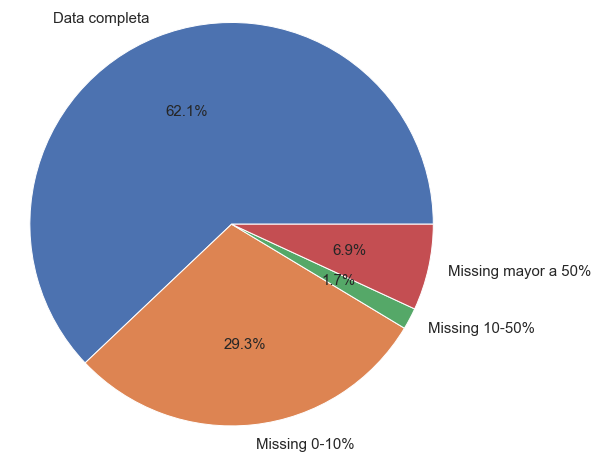

In [66]:
complete = (missing_data["Missing [%]"]<=10).sum()
a = ((missing_data["Missing [%]"]!=0) & (missing_data["Missing [%]"]<=10)).sum()
b = ((missing_data["Missing [%]"]>10) & (missing_data["Missing [%]"]<=50)).sum()
c = (missing_data["Missing [%]"]>50).sum()
print("Hay:\n{} columnas con missing values\n{} columnas con menos del 10% de missing values\n {} columnas con missing values entre el 10% y 50%\n {} columnas con mas del 50% de missing values".format(complete,a,b,c))

labels =["Data completa", "Missing 0-10%", "Missing 10-50%", "Missing mayor a 50%"]
fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie([complete,a,b,c],autopct='%1.1f%%',labels=labels, textprops={'fontsize': 15})
ax1.axis('equal')
plt.show()

In [67]:
nans = []
pcts = []
for cols in df2:
    nans.append(df2[cols].isnull().sum())
    pcts.append(df2[cols].isnull().sum()/df2.shape[0]*100)
    
missing_data2 = pd.DataFrame({"Column":df2.columns,"Missing Values": nans, "Missing [%]": pcts}).sort_values("Missing Values", ascending=False)
missing_data2[missing_data2["Missing Values"]!=0].reset_index(drop=True)

,Column,Missing Values,Missing [%]
0,PuaMode,999738,99.9738
1,Census_ProcessorClass,995875,99.5875
2,DefaultBrowsersIdentifier,951697,95.1697
3,Census_IsFlightingInternal,830157,83.0157
4,Census_InternalBatteryType,709830,70.9830
5,Census_ThresholdOptIn,634570,63.4570
6,Census_IsWIMBootEnabled,633713,63.3713
7,SmartScreen,355777,35.5777
8,OrganizationIdentifier,308936,30.8936
9,SMode,59902,5.9902


Hay:
74 columnas con missing values
35 columnas con menos del 10% de missing values
 2 columnas con missing values entre el 10% y 50%
 7 columnas con mas del 50% de missing values


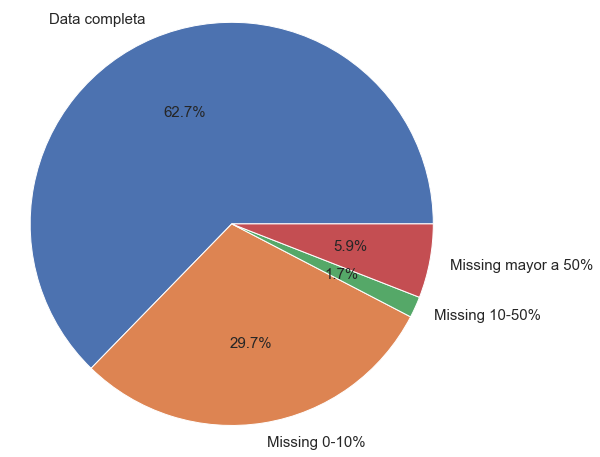

In [68]:
complete = (missing_data2["Missing [%]"]<=10).sum()
a = ((missing_data2["Missing [%]"]!=0) & (missing_data2["Missing [%]"]<=10)).sum()
b = ((missing_data2["Missing [%]"]>10) & (missing_data2["Missing [%]"]<=50)).sum()
c = (missing_data2["Missing [%]"]>50).sum()
print("Hay:\n{} columnas con missing values\n{} columnas con menos del 10% de missing values\n {} columnas con missing values entre el 10% y 50%\n {} columnas con mas del 50% de missing values".format(complete,a,b,c))

labels =["Data completa", "Missing 0-10%", "Missing 10-50%", "Missing mayor a 50%"]
fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie([complete,a,b,c],autopct='%1.1f%%',labels=labels, textprops={'fontsize': 15})
ax1.axis('equal')
plt.show()

Con estas gráficas podemos ver que ambos data set casi están balanceados entre sí porque tienen la misma proporcion de missing data y missing completa

## Más exploración

In [69]:
detect_no = (df2["HasDetections"]==0).sum()
detect_yes = (df2["HasDetections"]==1).sum()
total = detect_no + detect_yes
print("Existen:\n{} No detectados\n{} Detectados\n{} TOTAL".format(detect_no,detect_yes,total))

Existen:
500187 No detectados
499813 Detectados
1000000 TOTAL


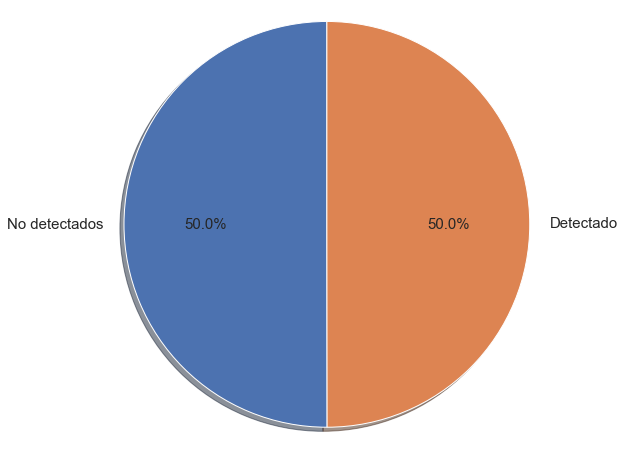

In [70]:
labels = 'No detectados', 'Detectado',
sizes = [detect_no, detect_yes]

fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90, textprops={'fontsize': 15})
ax1.axis('equal')

plt.show()

### Gráficos exploratorios

In [80]:
# Esta función la gráfica de distribución de categorías (gráfico circular) y la fracción de máquinas infectadas en cada categoría (gráfico de barras).
def grafica_doble(col_name, rotation=45, threshold=0.01, explode =-1):
    category = df2[col_name].unique().tolist()
    totals=[]
    infected=[]
    
    for i in category:
        a = (df2[col_name]==i).sum()
        totals.append(a)
        infected.append((df2[df2[col_name]==i]["HasDetections"]==1).sum()/a)
        
    #creating a summary dataframe
    df = pd.DataFrame({"Total":totals,"Infected": infected}, index=category).sort_values("Total", ascending=False) 
    fig, ax = plt.subplots(ncols=2, nrows=1,figsize=(20,8))
    
    #creating a pie chart with conditional explode option
    threshold = df2.shape[0]*threshold

    if explode==-1:
        ax[0].pie(df[df["Total"]>threshold]["Total"], labels=df[df["Total"]>threshold].index.values, autopct='%1.1f%%',shadow=False, startangle=rotation, textprops={'fontsize': 15})
    else:
        ax[0].pie(df[df["Total"]>threshold]["Total"], labels=df[df["Total"]>threshold].index.values, autopct='%1.1f%%',shadow=False, startangle=rotation, textprops={'fontsize': 15}, explode=explode)
    ax[0].axis('equal')
    ax[0].set_title(col_name)
    
    #created a sorted bar chart
    df.sort_values("Infected", ascending=False, inplace=True)
    ax[1].set_xticklabels(category,rotation=45, horizontalalignment='right')
    ax[1].set_title('Fracción Infectada')
    ax[1] = sns.barplot(x=df.index, y="Infected",data=df)
    plt.show()

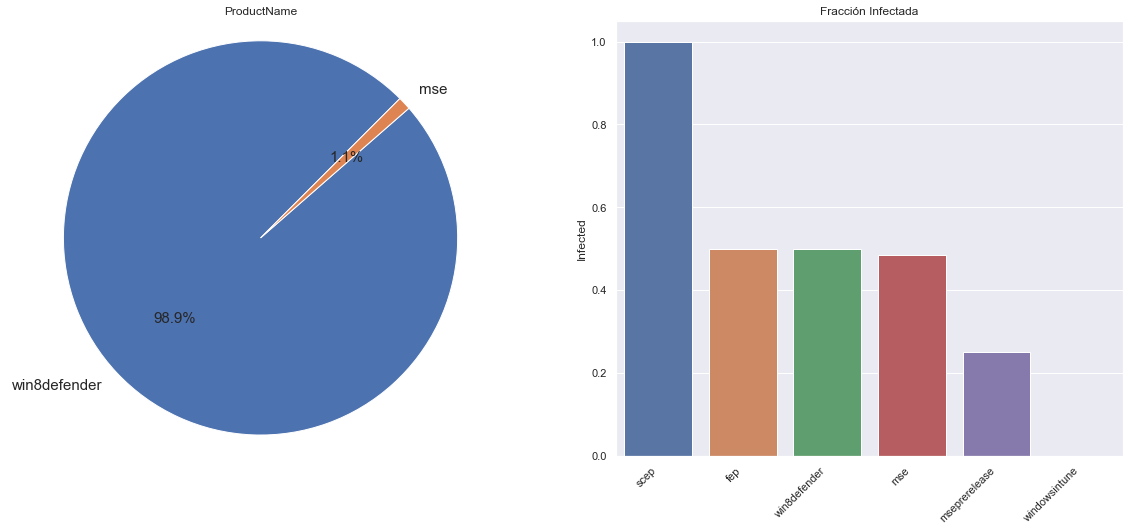

In [81]:
grafica_doble("ProductName",45)

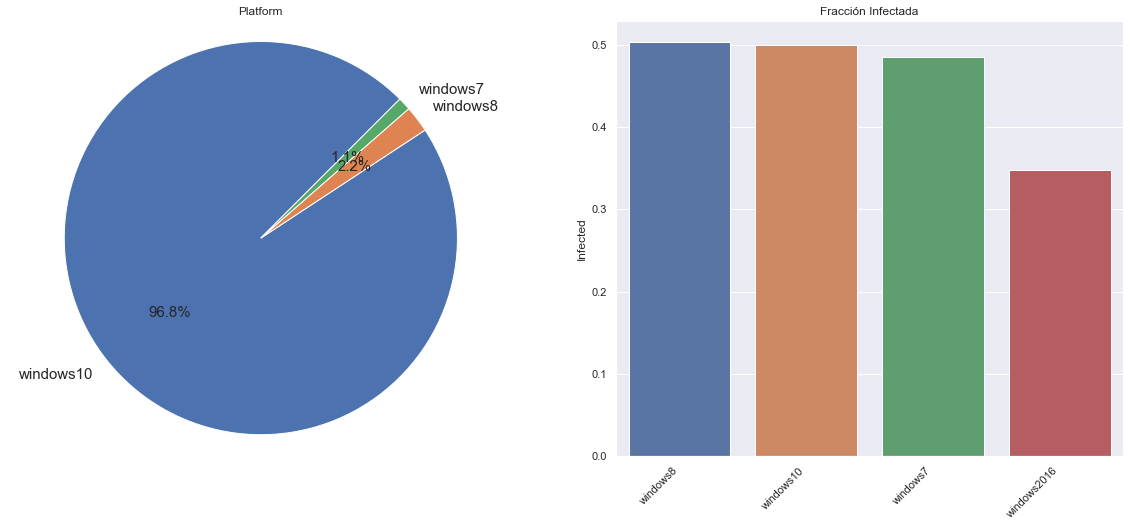

In [82]:
grafica_doble("Platform",45)

In [32]:
eda_numcat(df1, "HasDetections", method = "pps") 

Feature Importance in the prediction of HasDetections
The 'y' argument should be the name of a dataframe column but the variable that you passed is not a column in the given dataframe.
Please review the column name or your dataframe


#### Datos numéricos

Outlier Analysis - Boxplot


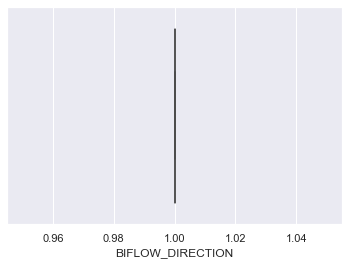

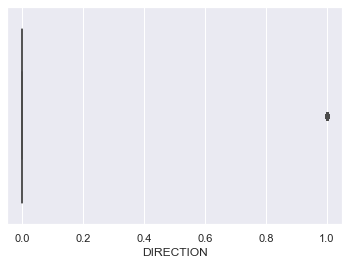

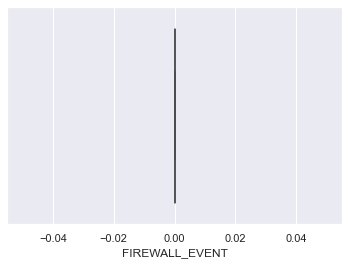

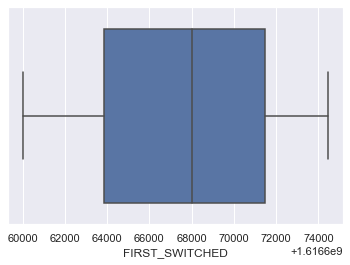

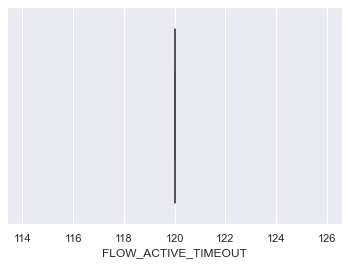

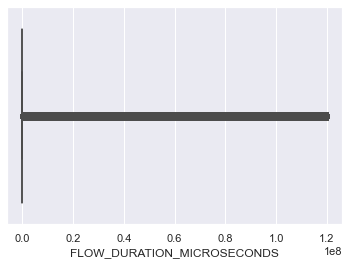

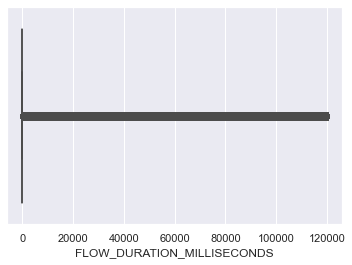

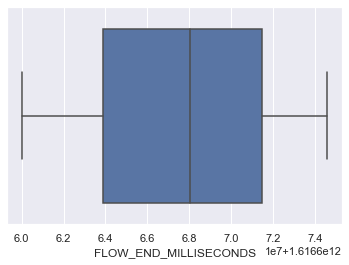

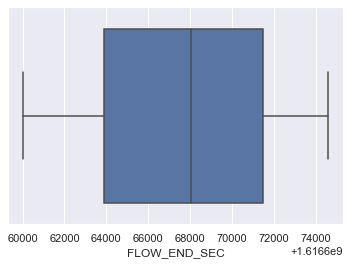

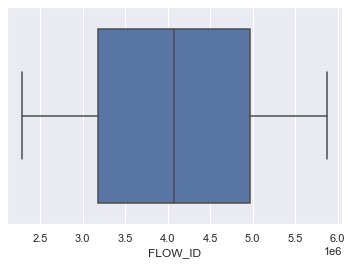

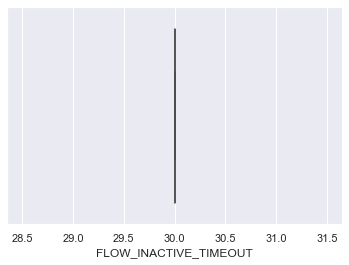

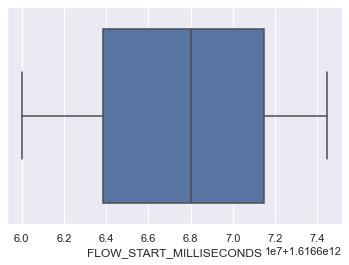

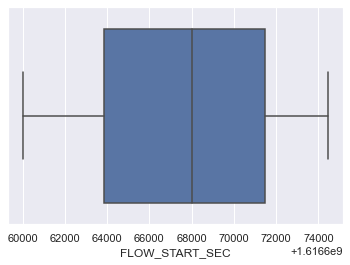

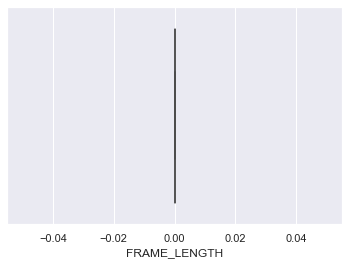

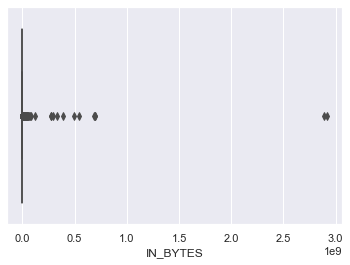

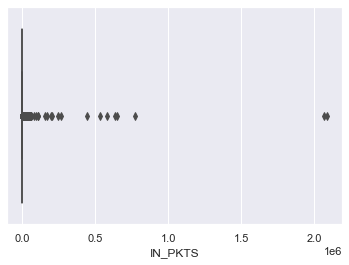

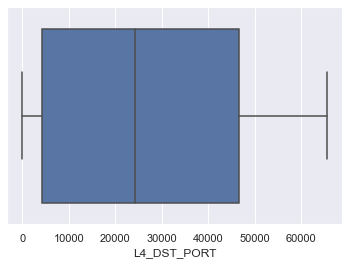

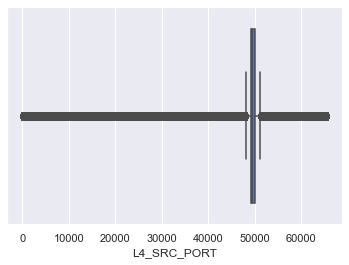

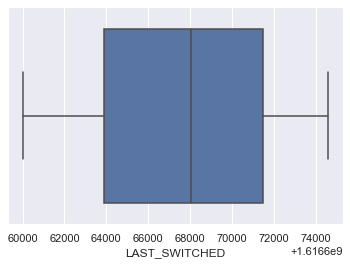

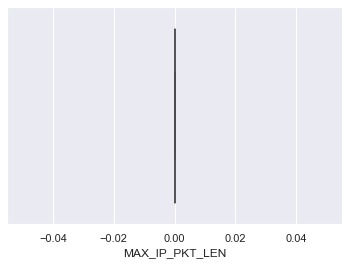

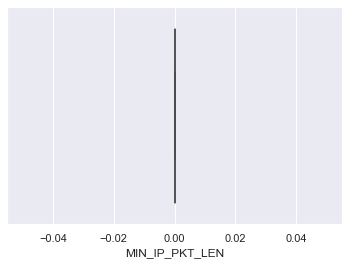

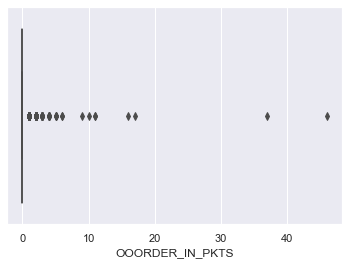

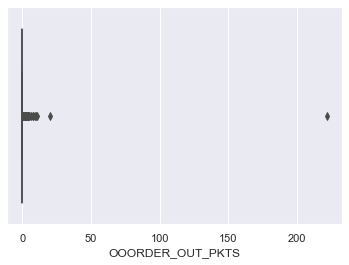

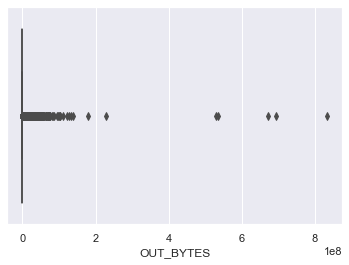

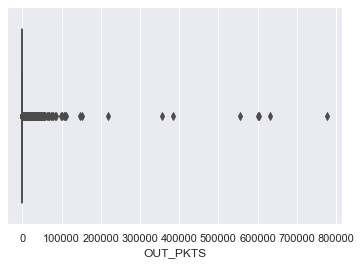

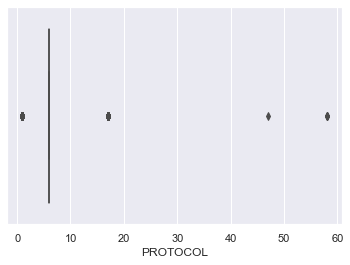

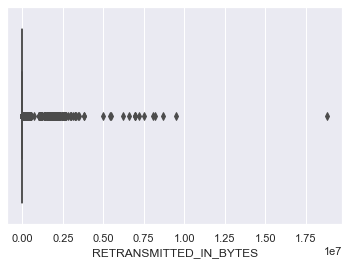

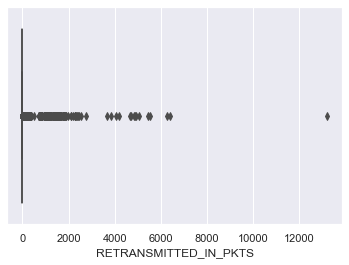

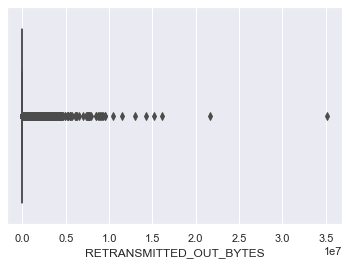

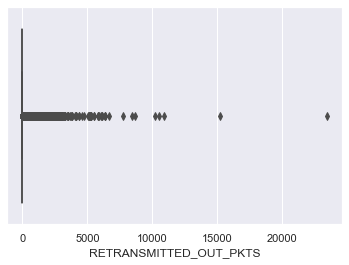

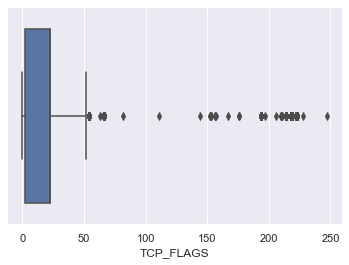

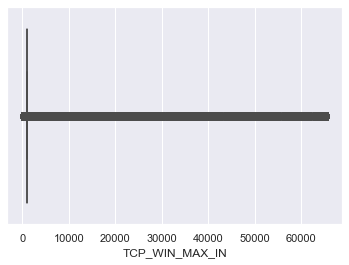

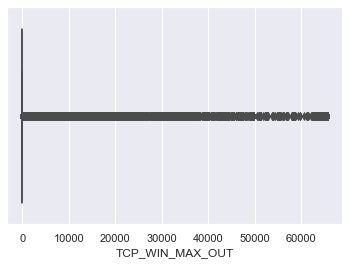

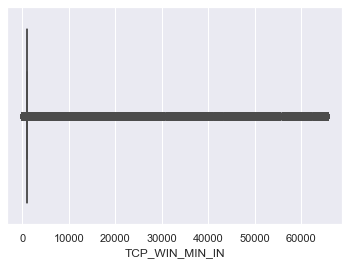

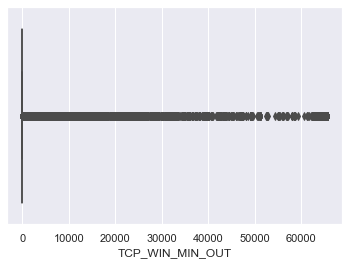

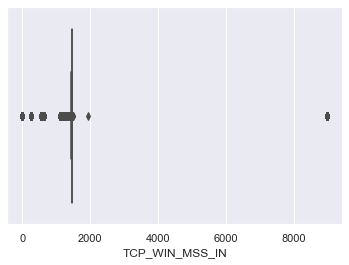

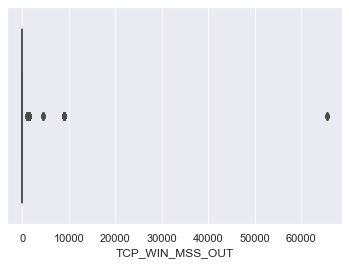

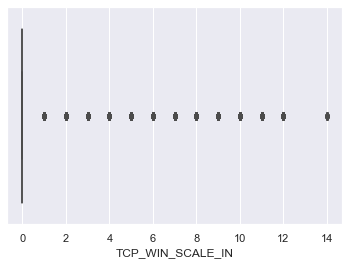

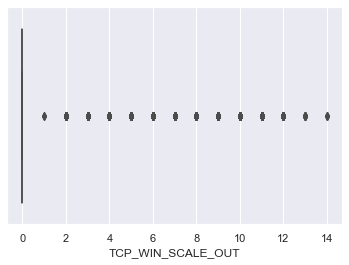

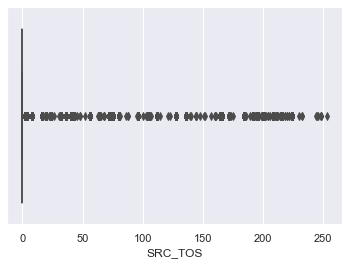

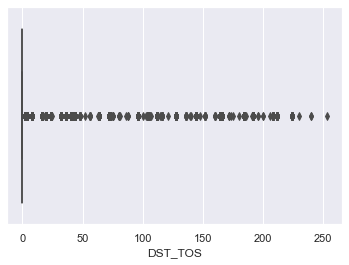

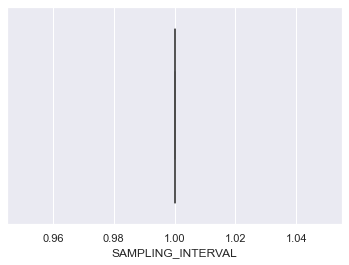

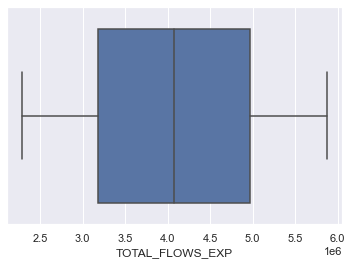

Distribution Analysis - Histogram


c:\users\camila\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



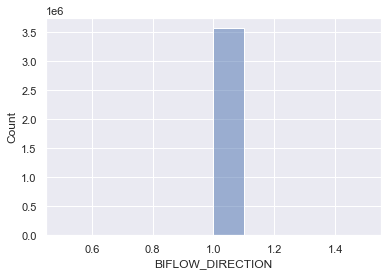

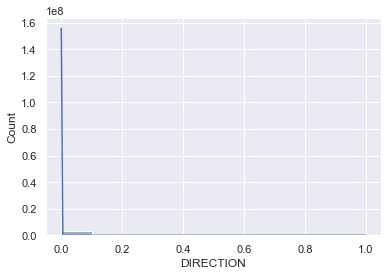

c:\users\camila\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



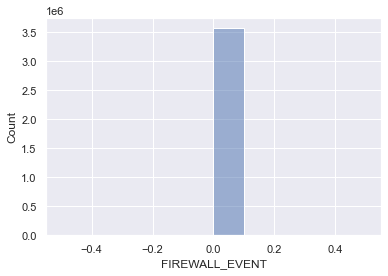

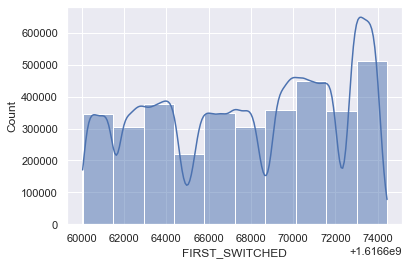

c:\users\camila\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



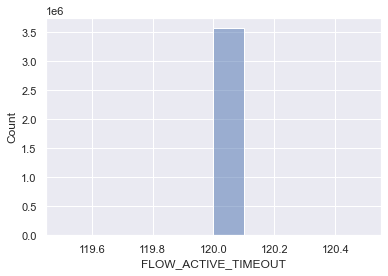

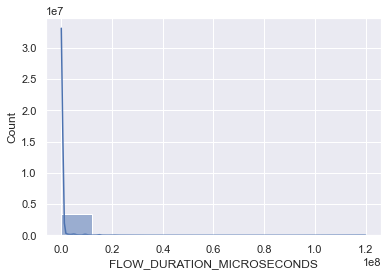

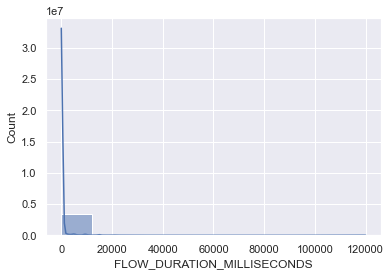

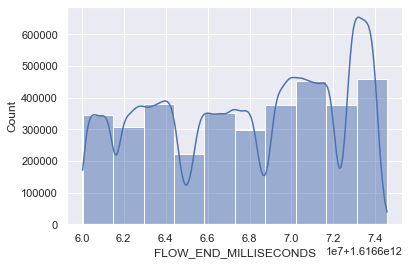

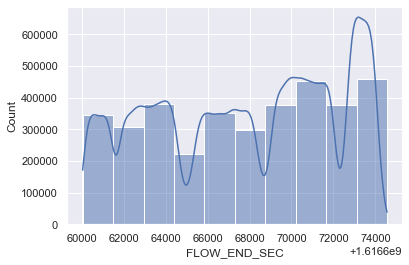

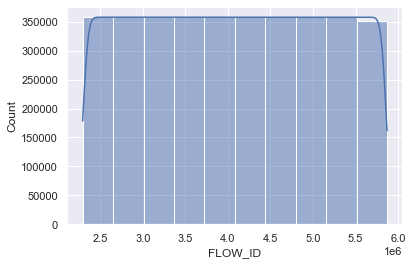

c:\users\camila\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



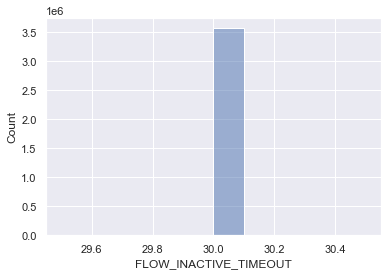

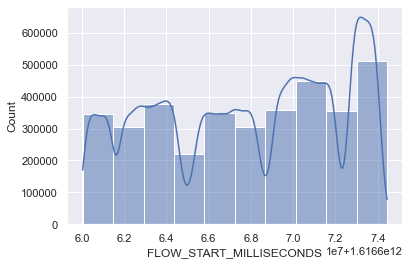

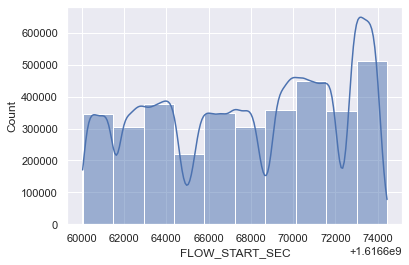

c:\users\camila\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



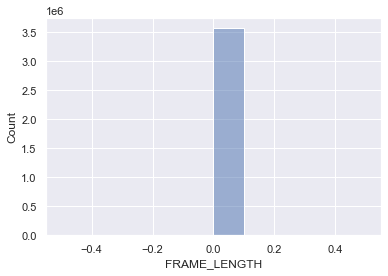

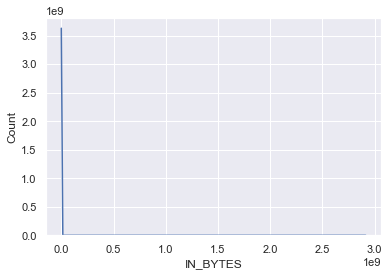

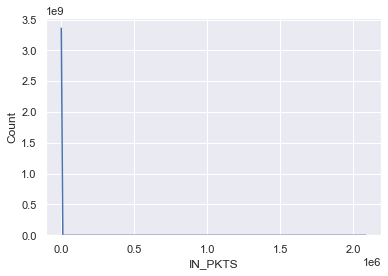

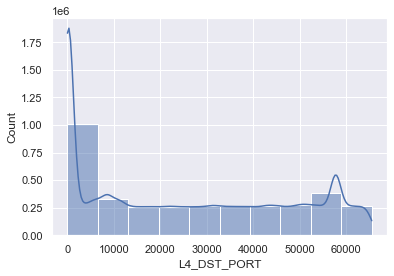

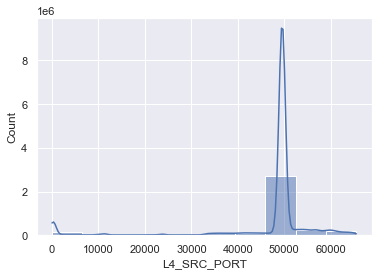

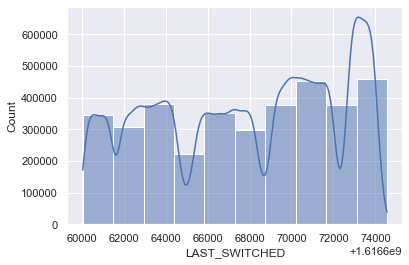

c:\users\camila\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



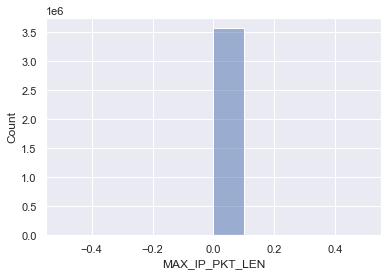

c:\users\camila\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



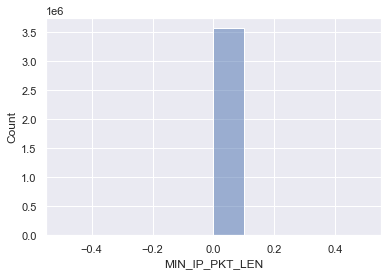

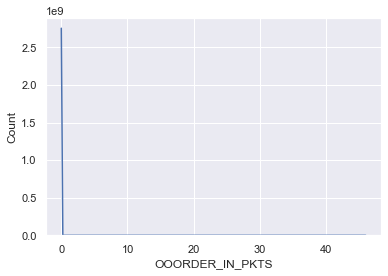

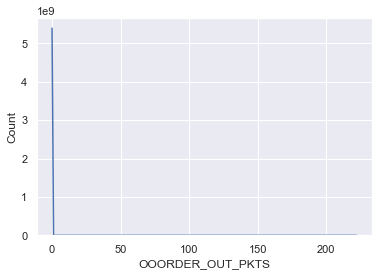

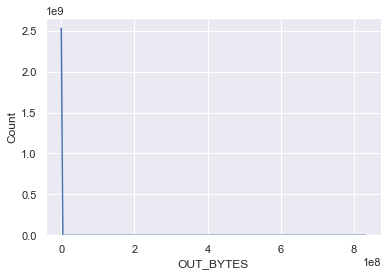

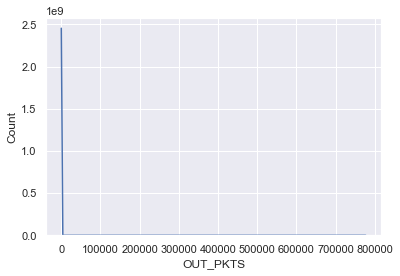

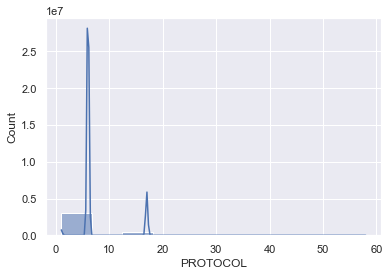

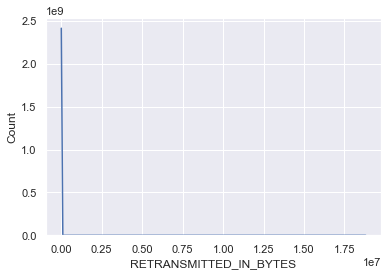

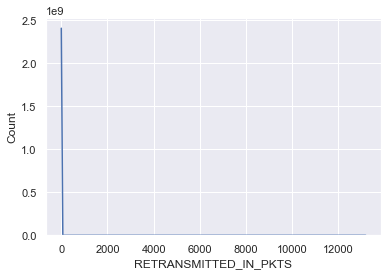

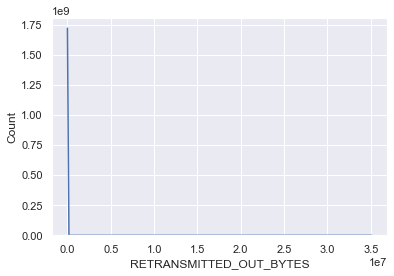

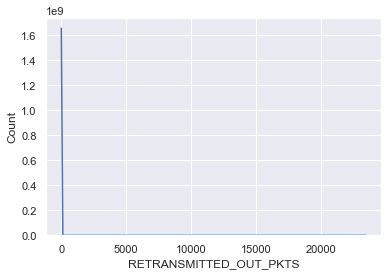

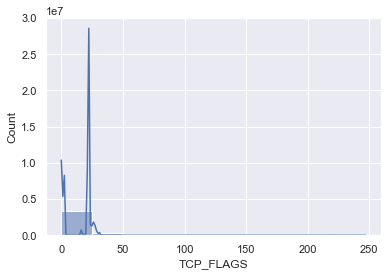

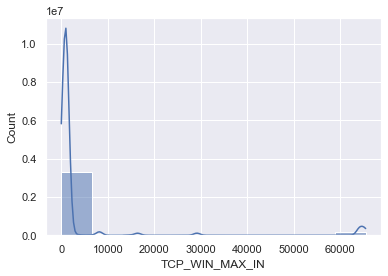

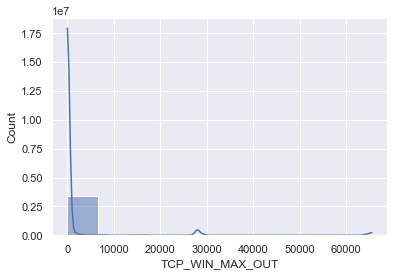

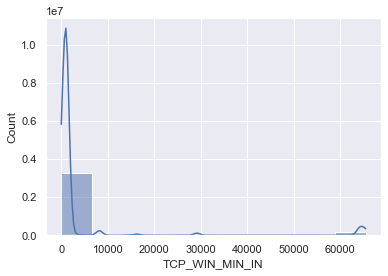

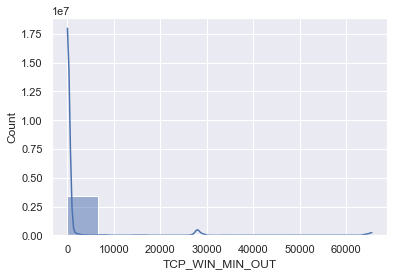

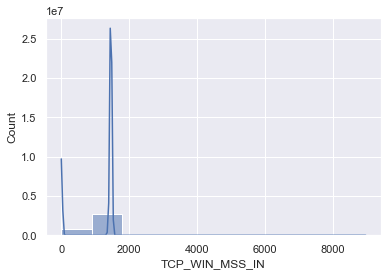

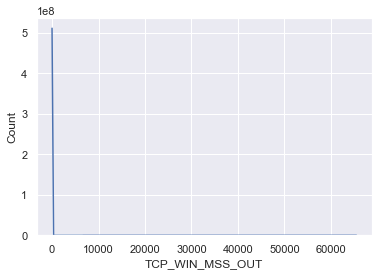

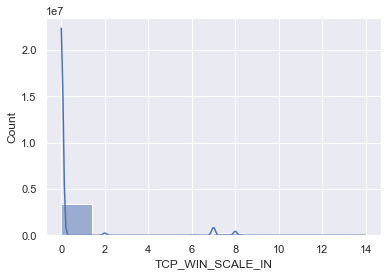

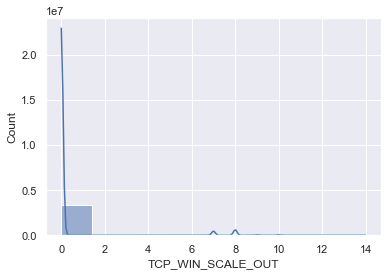

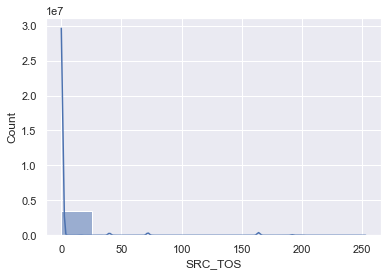

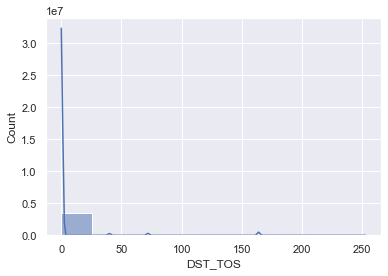

c:\users\camila\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



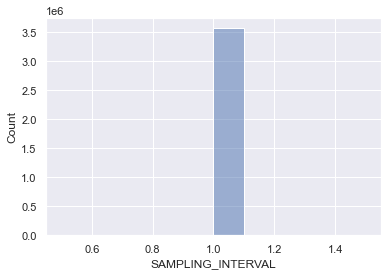

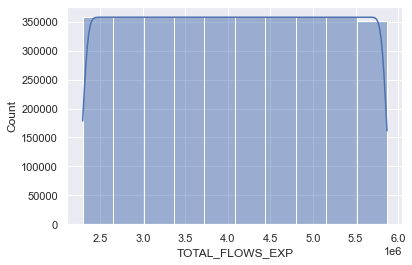

In [7]:
eda_num(df1)

Outlier Analysis - Boxplot


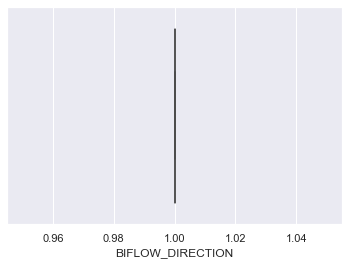

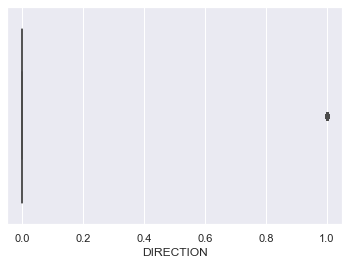

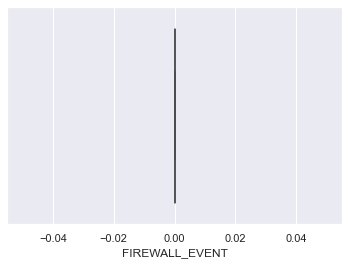

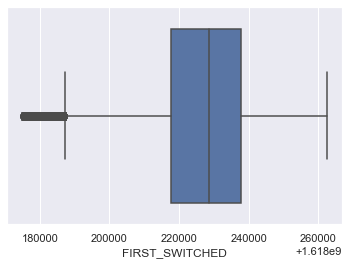

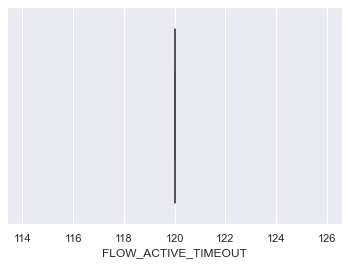

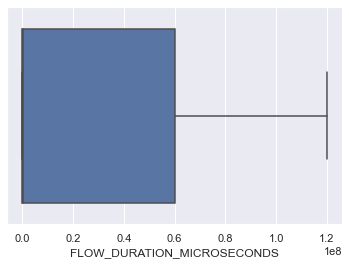

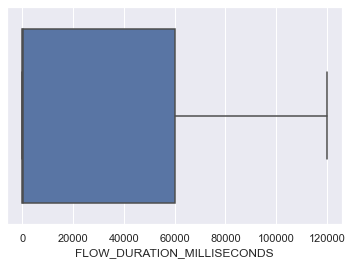

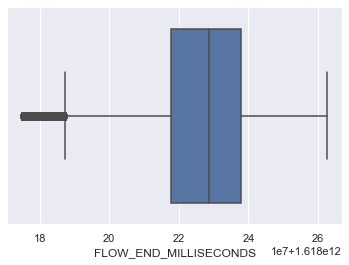

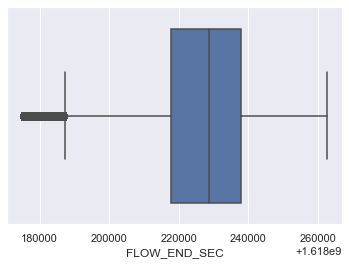

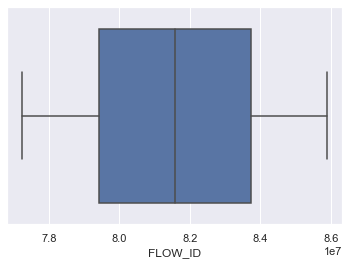

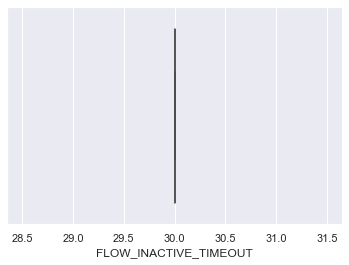

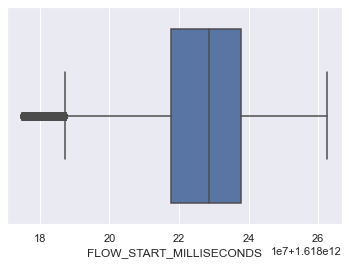

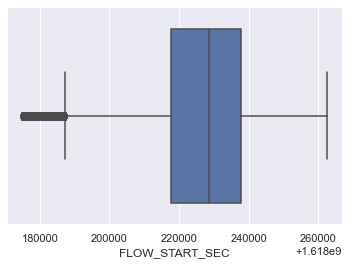

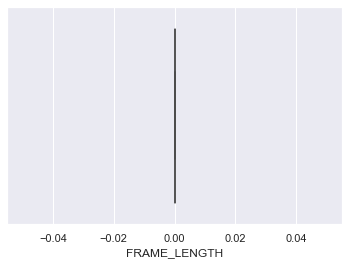

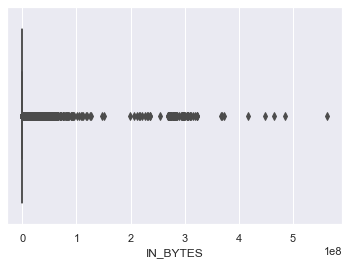

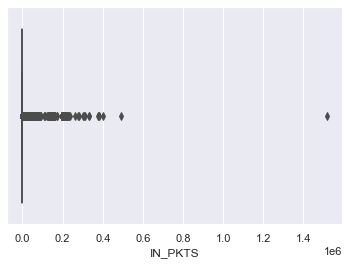

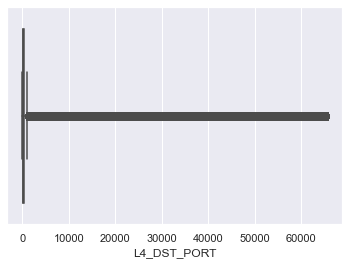

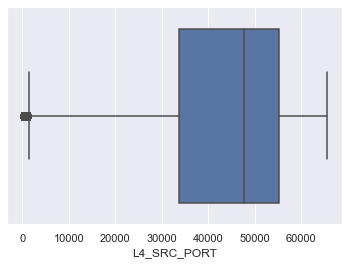

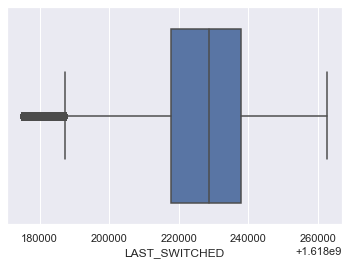

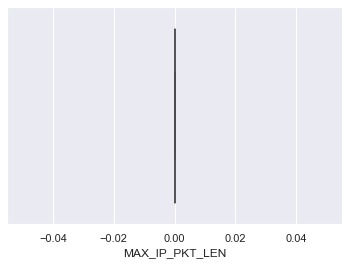

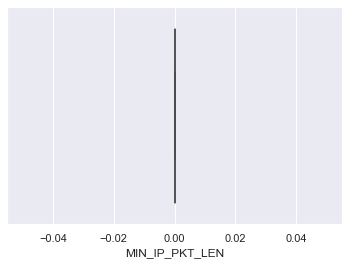

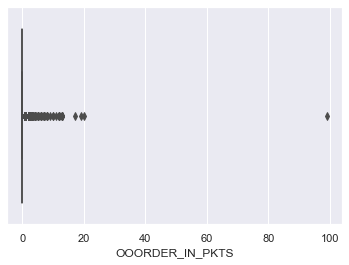

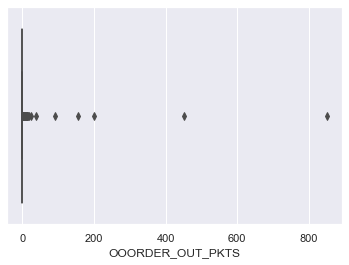

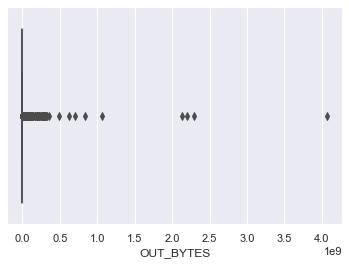

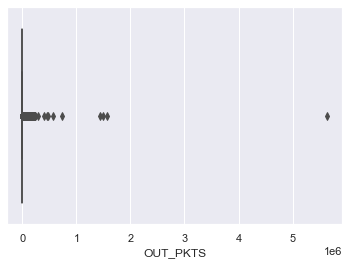

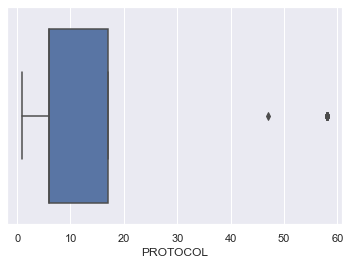

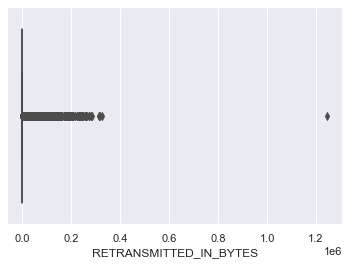

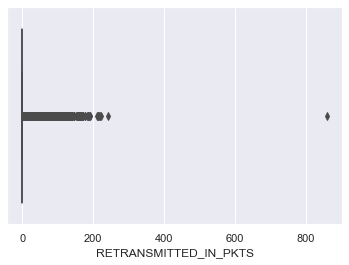

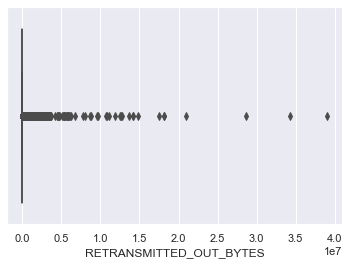

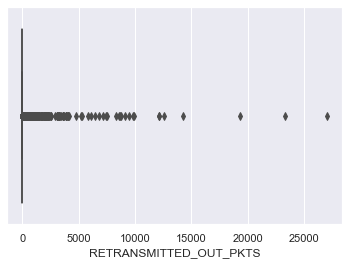

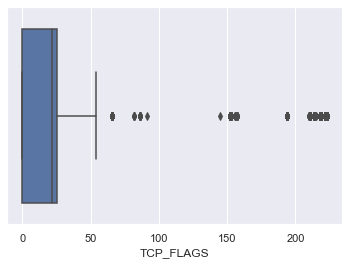

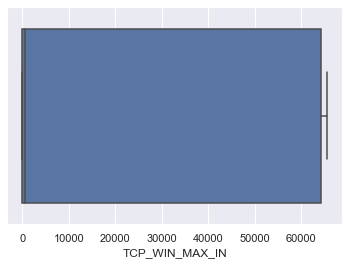

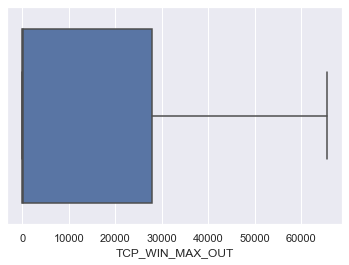

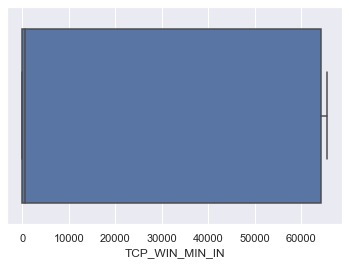

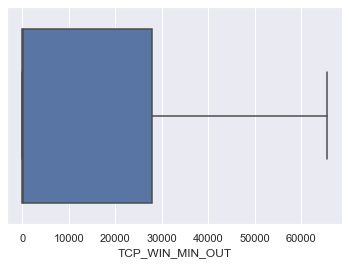

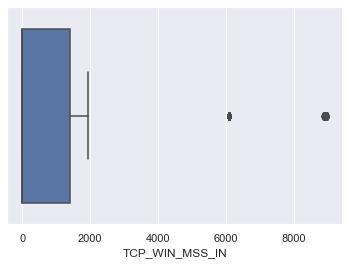

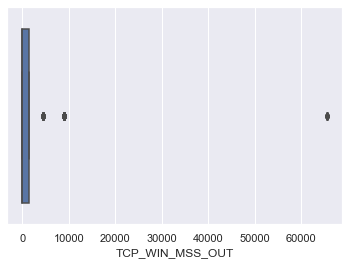

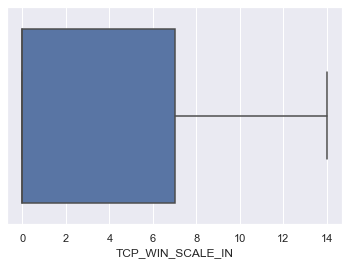

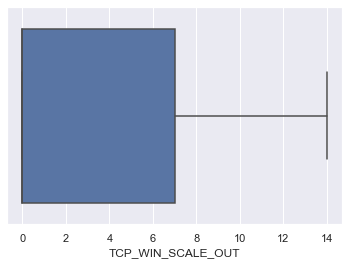

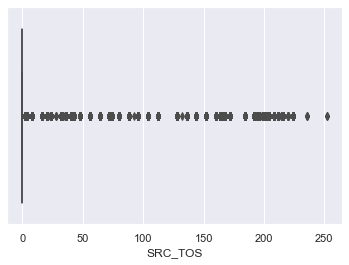

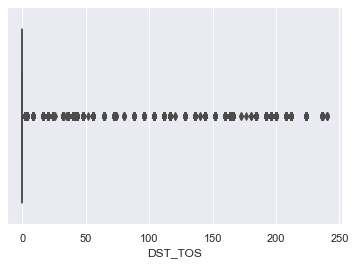

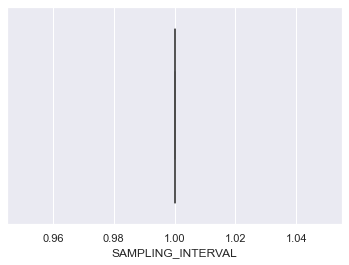

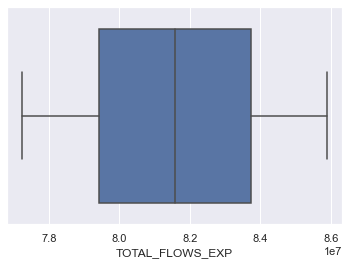

Distribution Analysis - Histogram


c:\users\camila\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



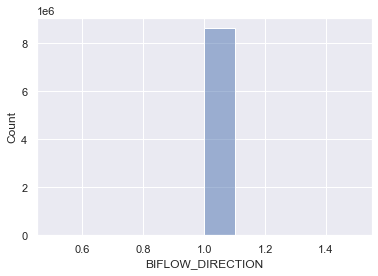

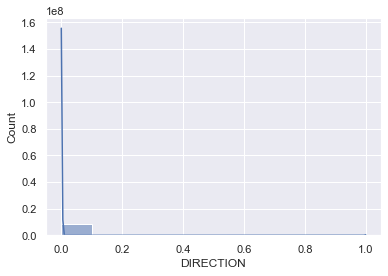

c:\users\camila\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



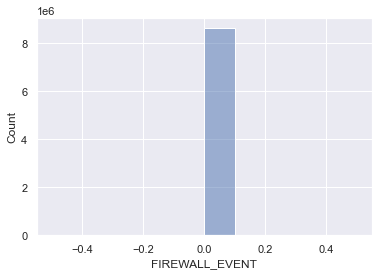

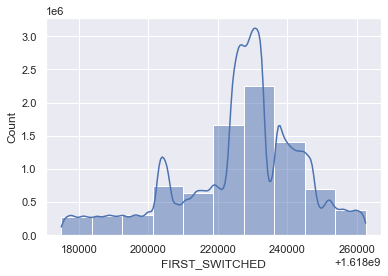

c:\users\camila\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



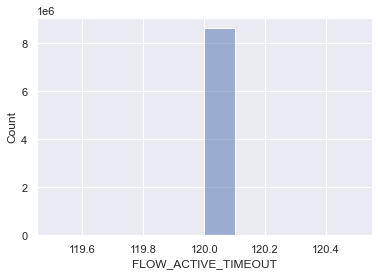

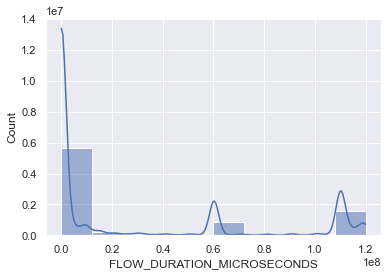

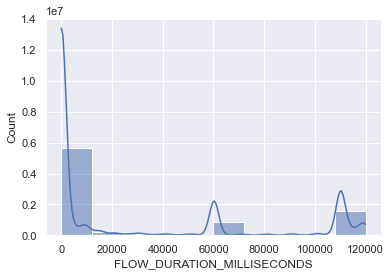

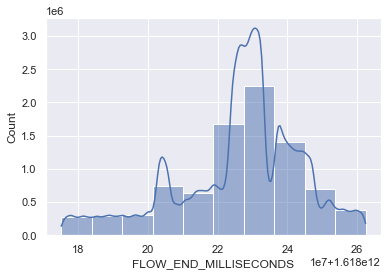

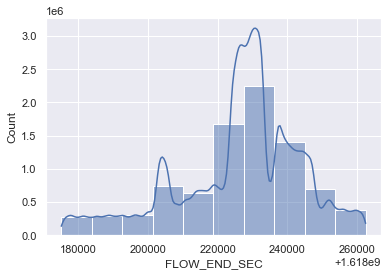

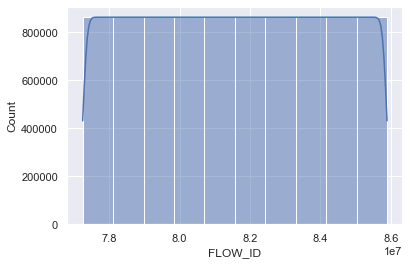

c:\users\camila\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



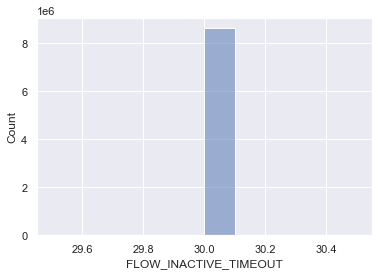

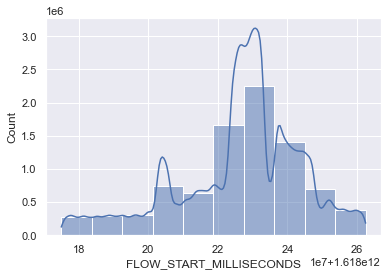

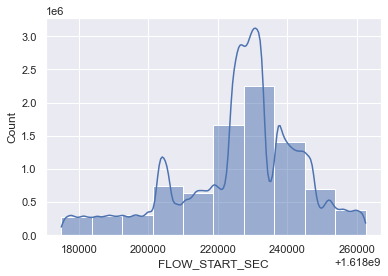

c:\users\camila\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



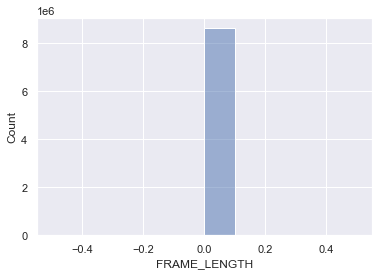

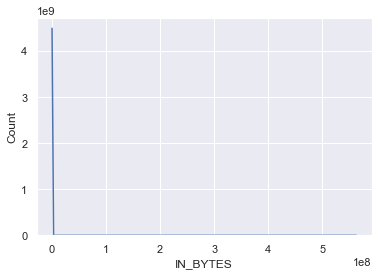

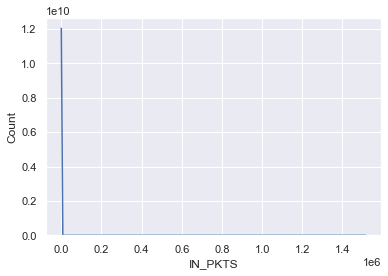

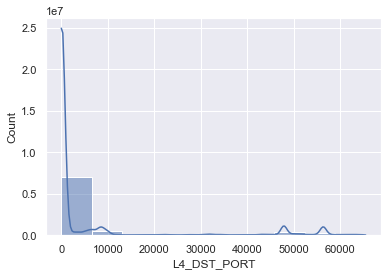

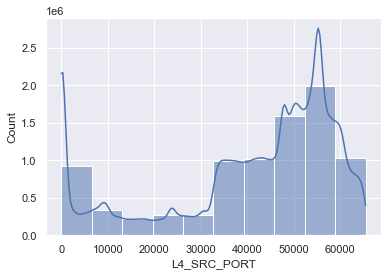

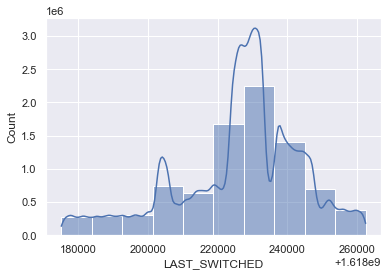

c:\users\camila\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



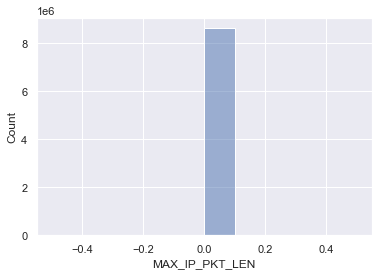

c:\users\camila\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



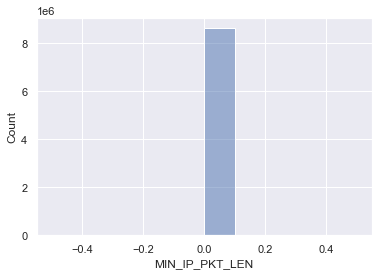

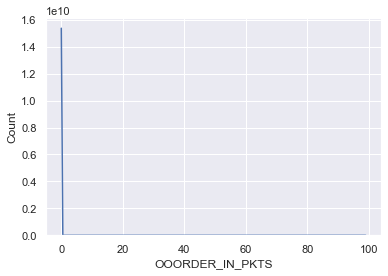

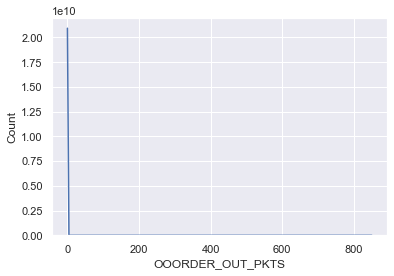

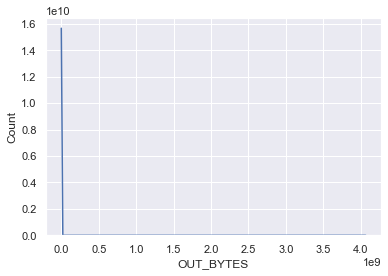

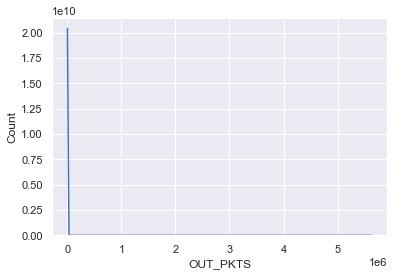

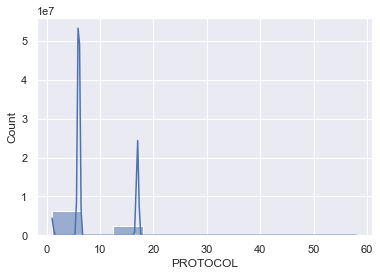

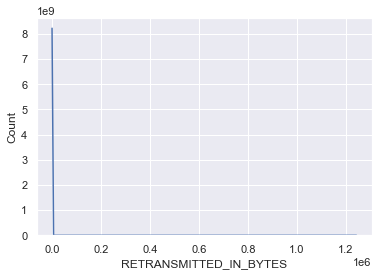

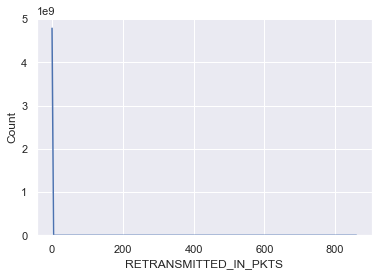

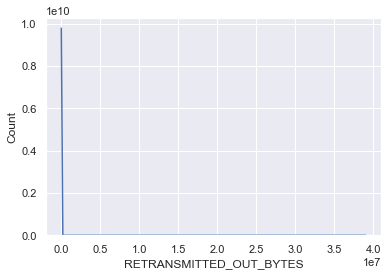

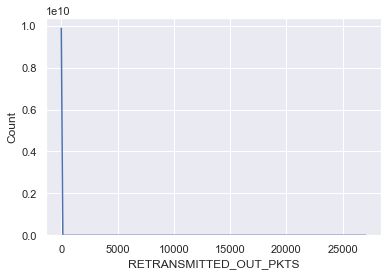

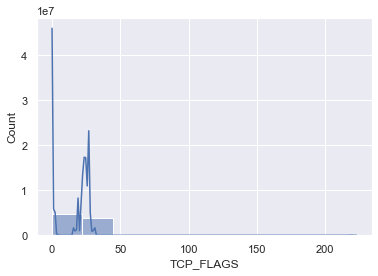

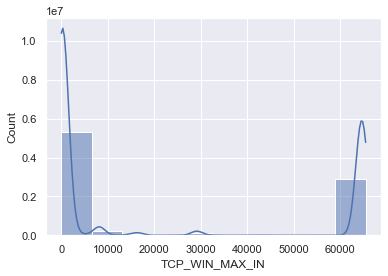

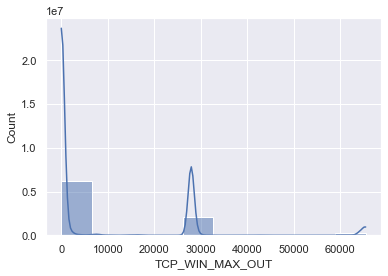

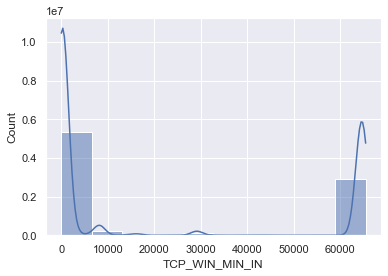

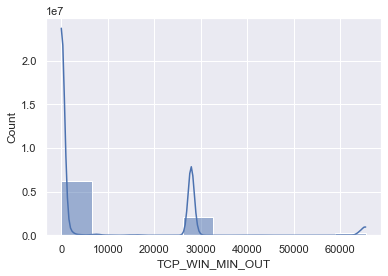

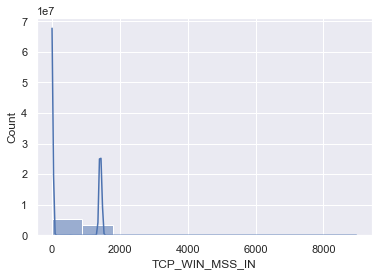

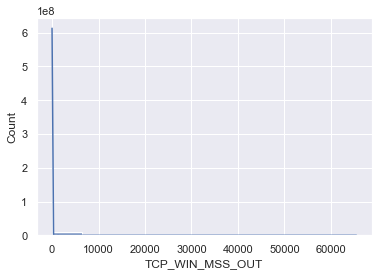

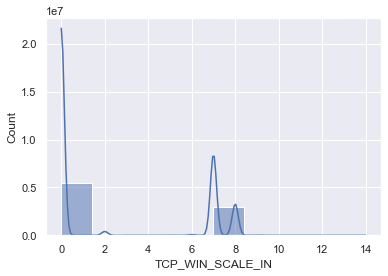

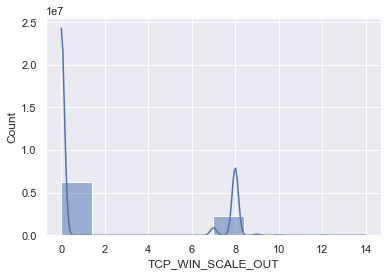

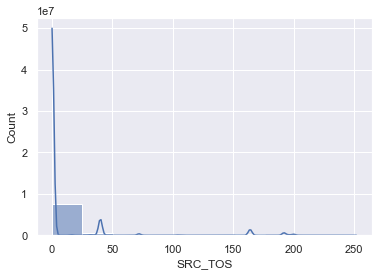

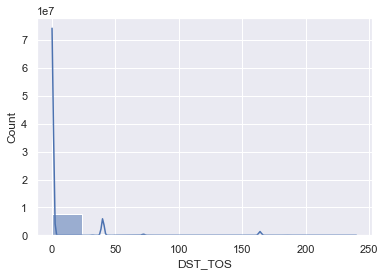

c:\users\camila\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



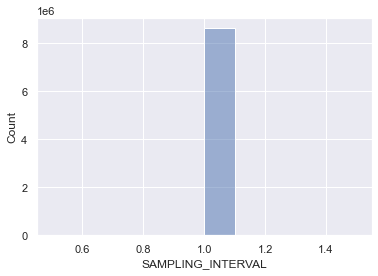

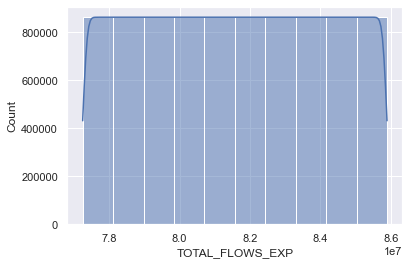

In [8]:
eda_num(df2)

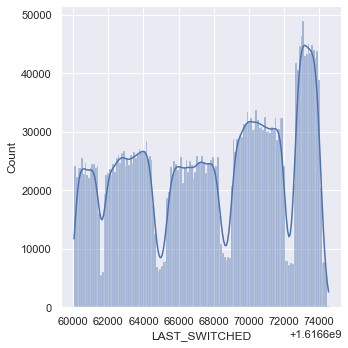

In [9]:
sns.displot(df1['LAST_SWITCHED'], kde = True);

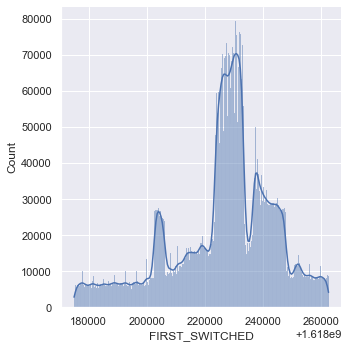

In [10]:
sns.displot(df2['FIRST_SWITCHED'], kde = True);

#### Datos categóricos

Bar Plot of LABEL


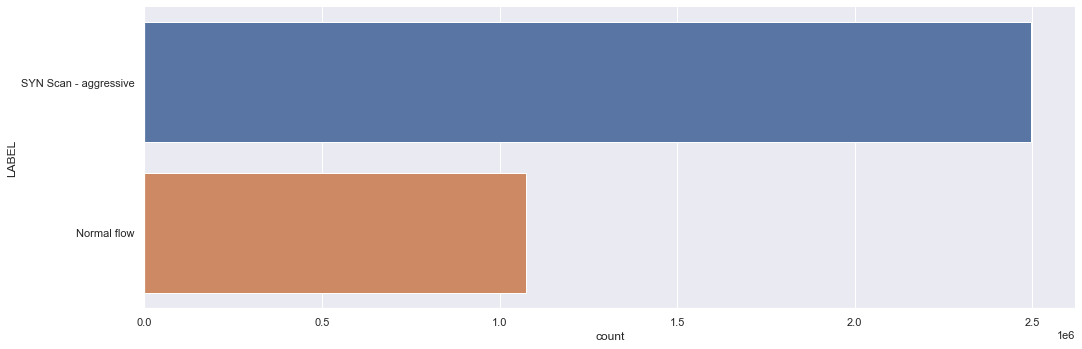

Summary of LABEL


,count,relative_pct
SYN Scan - aggressive,2496814,0.7
Normal flow,1073852,0.3


In [11]:
eda_cat(df1, x = "LABEL")

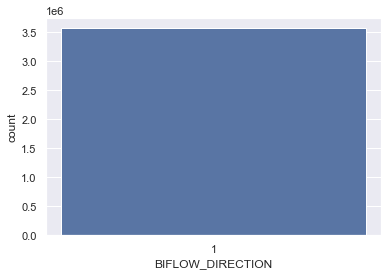

In [3]:
sns.countplot(x = 'BIFLOW_DIRECTION', data = df1);

In [4]:
df1['DIRECTION'].value_counts() 

0    3569421
1       1245
Name: DIRECTION, dtype: int64

## Matriz de correlacion

In [3]:
eda_num(df1, method='correlation')

Correlation Analysis - Heatmap


c:\users\camila\appdata\local\programs\python\python38\lib\site-packages\quickda\explore_numeric.py:30: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



,BIFLOW_DIRECTION,DIRECTION,FIREWALL_EVENT,FIRST_SWITCHED,FLOW_ACTIVE_TIMEOUT,FLOW_DURATION_MICROSECONDS,FLOW_DURATION_MILLISECONDS,FLOW_END_MILLISECONDS,FLOW_END_SEC,FLOW_ID,FLOW_INACTIVE_TIMEOUT,FLOW_START_MILLISECONDS,FLOW_START_SEC,FRAME_LENGTH,IN_BYTES,IN_PKTS,L4_DST_PORT,L4_SRC_PORT,LAST_SWITCHED,MAX_IP_PKT_LEN,MIN_IP_PKT_LEN,OOORDER_IN_PKTS,OOORDER_OUT_PKTS,OUT_BYTES,OUT_PKTS,PROTOCOL,RETRANSMITTED_IN_BYTES,RETRANSMITTED_IN_PKTS,RETRANSMITTED_OUT_BYTES,RETRANSMITTED_OUT_PKTS,TCP_FLAGS,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,TCP_WIN_MIN_IN,TCP_WIN_MIN_OUT,TCP_WIN_MSS_IN,TCP_WIN_MSS_OUT,TCP_WIN_SCALE_IN,TCP_WIN_SCALE_OUT,SRC_TOS,DST_TOS,SAMPLING_INTERVAL,TOTAL_FLOWS_EXP
BIFLOW_DIRECTION,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
DIRECTION,nan,1.00,nan,0.01,nan,0.19,0.19,0.01,0.01,0.01,nan,0.01,0.01,nan,0.02,0.04,0.01,-0.04,0.01,nan,nan,0.01,0.00,0.03,0.06,0.02,0.10,0.10,0.00,0.00,-0.01,-0.00,0.00,-0.00,0.00,-0.03,-0.00,-0.00,-0.00,0.03,0.01,nan,0.01
FIREWALL_EVENT,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
FIRST_SWITCHED,nan,0.01,nan,1.00,nan,0.01,0.01,1.00,1.00,1.00,nan,1.00,1.00,nan,0.00,0.00,0.02,0.05,1.00,nan,nan,0.00,0.00,-0.00,-0.00,-0.01,-0.00,-0.00,-0.01,-0.01,-0.17,0.00,-0.01,0.00,-0.01,0.02,-0.01,-0.00,-0.02,0.02,0.01,nan,1.00
FLOW_ACTIVE_TIMEOUT,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
FLOW_DURATION_MICROSECONDS,nan,0.19,nan,0.01,nan,1.00,1.00,0.01,0.01,0.01,nan,0.01,0.01,nan,0.02,0.04,-0.07,-0.17,0.01,nan,nan,0.03,0.01,0.08,0.08,0.07,0.04,0.04,0.11,0.11,0.01,0.10,0.11,0.09,0.11,-0.18,0.09,0.09,0.09,0.05,0.06,nan,0.01
FLOW_DURATION_MILLISECONDS,nan,0.19,nan,0.01,nan,1.00,1.00,0.01,0.01,0.01,nan,0.01,0.01,nan,0.02,0.04,-0.07,-0.17,0.01,nan,nan,0.03,0.01,0.08,0.08,0.07,0.04,0.04,0.11,0.11,0.01,0.10,0.11,0.09,0.11,-0.18,0.09,0.09,0.09,0.05,0.06,nan,0.01
FLOW_END_MILLISECONDS,nan,0.01,nan,1.00,nan,0.01,0.01,1.00,1.00,1.00,nan,1.00,1.00,nan,0.00,0.00,0.02,0.05,1.00,nan,nan,0.00,0.00,-0.00,-0.00,-0.01,-0.00,-0.00,-0.01,-0.01,-0.17,0.00,-0.01,0.00,-0.01,0.02,-0.01,-0.00,-0.02,0.02,0.01,nan,1.00
FLOW_END_SEC,nan,0.01,nan,1.00,nan,0.01,0.01,1.00,1.00,1.00,nan,1.00,1.00,nan,0.00,0.00,0.02,0.05,1.00,nan,nan,0.00,0.00,-0.00,-0.00,-0.01,-0.00,-0.00,-0.01,-0.01,-0.17,0.00,-0.01,0.00,-0.01,0.02,-0.01,-0.00,-0.02,0.02,0.01,nan,1.00
FLOW_ID,nan,0.01,nan,1.00,nan,0.01,0.01,1.00,1.00,1.00,nan,1.00,1.00,nan,0.00,0.00,0.02,0.05,1.00,nan,nan,-0.00,-0.00,-0.00,-0.00,-0.01,-0.00,-0.00,-0.01,-0.01,-0.19,-0.00,-0.01,-0.00,-0.01,0.02,-0.01,-0.01,-0.02,0.02,0.01,nan,1.00


In [4]:
eda_num(df2, method='correlation')

Correlation Analysis - Heatmap


,BIFLOW_DIRECTION,DIRECTION,FIREWALL_EVENT,FIRST_SWITCHED,FLOW_ACTIVE_TIMEOUT,FLOW_DURATION_MICROSECONDS,FLOW_DURATION_MILLISECONDS,FLOW_END_MILLISECONDS,FLOW_END_SEC,FLOW_ID,FLOW_INACTIVE_TIMEOUT,FLOW_START_MILLISECONDS,FLOW_START_SEC,FRAME_LENGTH,IN_BYTES,IN_PKTS,L4_DST_PORT,L4_SRC_PORT,LAST_SWITCHED,MAX_IP_PKT_LEN,MIN_IP_PKT_LEN,OOORDER_IN_PKTS,OOORDER_OUT_PKTS,OUT_BYTES,OUT_PKTS,PROTOCOL,RETRANSMITTED_IN_BYTES,RETRANSMITTED_IN_PKTS,RETRANSMITTED_OUT_BYTES,RETRANSMITTED_OUT_PKTS,TCP_FLAGS,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,TCP_WIN_MIN_IN,TCP_WIN_MIN_OUT,TCP_WIN_MSS_IN,TCP_WIN_MSS_OUT,TCP_WIN_SCALE_IN,TCP_WIN_SCALE_OUT,SRC_TOS,DST_TOS,SAMPLING_INTERVAL,TOTAL_FLOWS_EXP
BIFLOW_DIRECTION,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
DIRECTION,nan,1.00,nan,0.00,nan,0.09,0.09,0.00,0.00,-0.00,nan,0.00,0.00,nan,0.02,0.04,0.12,-0.11,0.00,nan,nan,-0.00,0.00,0.02,0.02,-0.01,0.00,-0.01,-0.00,0.00,0.02,-0.04,-0.03,-0.04,-0.03,-0.04,-0.03,-0.04,-0.03,-0.01,-0.01,nan,-0.00
FIREWALL_EVENT,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
FIRST_SWITCHED,nan,0.00,nan,1.00,nan,0.16,0.16,1.00,1.00,0.95,nan,1.00,1.00,nan,-0.01,-0.00,-0.05,-0.04,1.00,nan,nan,-0.01,0.00,-0.00,-0.00,-0.13,-0.02,0.01,0.01,0.01,0.17,0.08,0.12,0.08,0.12,0.06,0.19,0.05,0.20,-0.06,-0.10,nan,0.95
FLOW_ACTIVE_TIMEOUT,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
FLOW_DURATION_MICROSECONDS,nan,0.09,nan,0.16,nan,1.00,1.00,0.17,0.17,0.12,nan,0.16,0.16,nan,0.01,0.02,-0.22,-0.05,0.17,nan,nan,-0.01,0.00,0.00,0.01,-0.30,0.04,0.38,-0.01,-0.01,0.42,0.00,0.04,0.00,0.04,-0.04,0.10,-0.03,0.11,-0.17,-0.15,nan,0.12
FLOW_DURATION_MILLISECONDS,nan,0.09,nan,0.16,nan,1.00,1.00,0.17,0.17,0.12,nan,0.16,0.16,nan,0.01,0.02,-0.22,-0.05,0.17,nan,nan,-0.01,0.00,0.00,0.01,-0.30,0.04,0.38,-0.01,-0.01,0.42,0.00,0.04,0.00,0.04,-0.04,0.10,-0.03,0.11,-0.17,-0.15,nan,0.12
FLOW_END_MILLISECONDS,nan,0.00,nan,1.00,nan,0.17,0.17,1.00,1.00,0.95,nan,1.00,1.00,nan,-0.01,-0.00,-0.05,-0.04,1.00,nan,nan,-0.01,0.00,-0.00,-0.00,-0.13,-0.02,0.01,0.01,0.01,0.18,0.08,0.12,0.08,0.12,0.06,0.19,0.05,0.21,-0.06,-0.10,nan,0.95
FLOW_END_SEC,nan,0.00,nan,1.00,nan,0.17,0.17,1.00,1.00,0.95,nan,1.00,1.00,nan,-0.01,-0.00,-0.05,-0.04,1.00,nan,nan,-0.01,0.00,-0.00,-0.00,-0.13,-0.02,0.01,0.01,0.01,0.18,0.08,0.12,0.08,0.12,0.06,0.19,0.05,0.21,-0.06,-0.10,nan,0.95
FLOW_ID,nan,-0.00,nan,0.95,nan,0.12,0.12,0.95,0.95,1.00,nan,0.95,0.95,nan,-0.01,-0.00,-0.05,-0.05,0.95,nan,nan,-0.00,0.00,-0.00,-0.00,-0.13,-0.02,-0.01,0.01,0.01,0.16,0.11,0.14,0.11,0.14,0.09,0.22,0.08,0.23,-0.04,-0.10,nan,1.00


## Reporte Final

In [3]:
profile = ProfileReport(df1, minimal=True, title='Reporte Explorativo - parte 1')
profile.to_file('ReporteExplorativo_parte 1.html')

Summarize dataset:   0%|          | 0/58 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
profile = ProfileReport(df2, minimal=True, title='Reporte Explorativo - parte 2')
profile.to_file('ReporteExplorativo_parte 2.html')

Summarize dataset:   0%|          | 0/58 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]